In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from FLD_methods import *
from calculate_error import *

# Get data ready

In [3]:
# get the filepath names
e_pathname = "/Users/jameswallace/Desktop/Project/data/verification_run_2021-06-14-1239/Esun.csv"
l_pathname = "/Users/jameswallace/Desktop/Project/data/verification_run_2021-06-14-1239/Lo_spectrum_inclF.csv"
f_pathname = "/Users/jameswallace/Desktop/Project/data/verification_run_2021-06-14-1239/fluorescence_scalars.csv"
# place the spectra in readable dataframes
e_df = get_simulated_spectral_df(e_pathname)
l_df = get_simulated_spectral_df(l_pathname)
f_df = pd.read_csv(f_pathname)
f_df = f_df.iloc[2:]
f_df.index = np.arange(0, len(e_df))
# get the O2A fluorescence from the fluorescence scalars df
f_761 = pd.to_numeric(f_df['F761'])
# now average them for every ten rows
e_average = average_dataframe(e_df, 10)
l_average = average_dataframe(l_df, 10)
f_average = average_dataframe(f_761, 10)

# Test the sFLD and 3FLD methods

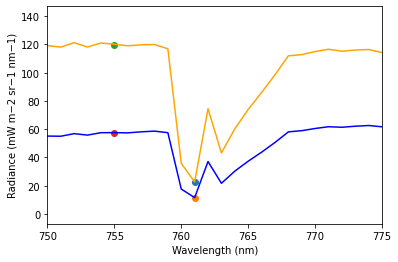

0.7854526312803481

In [5]:
sFLD(np.asarray(e_average.iloc[0]) /np.pi, np.asarray(l_average.iloc[0]), np.arange(400, 2562), fwhm = 1, plot = True)

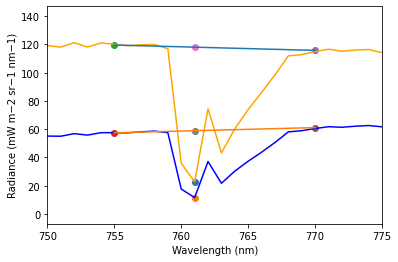

0.2652094387825928

In [6]:
three_FLD(np.asarray(e_average.iloc[0]) /np.pi, np.asarray(l_average.iloc[0]), np.arange(400, 2562), fwhm = 1, plot = True)

# Now calculate the average percentage error for each method on the simulated test dataset

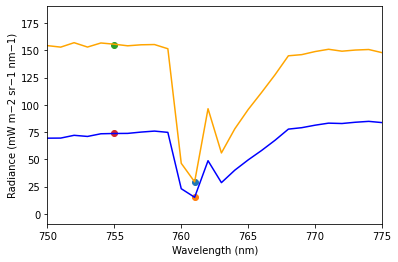

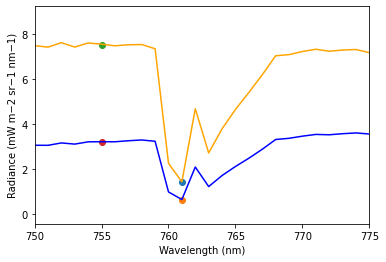

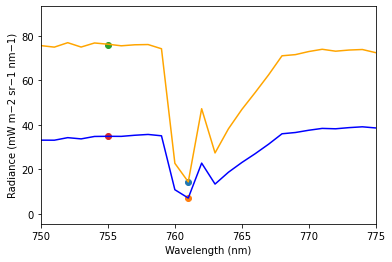

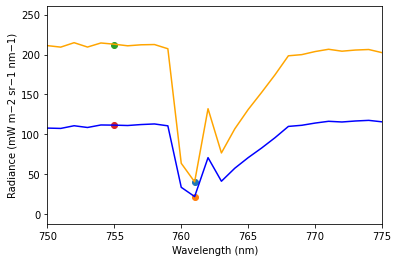

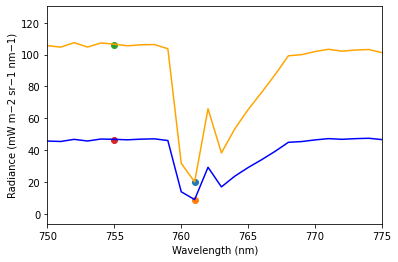

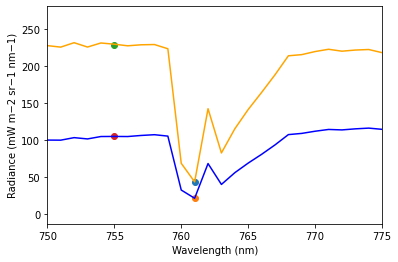

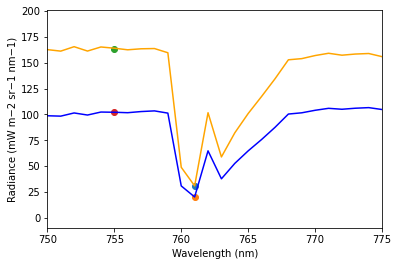

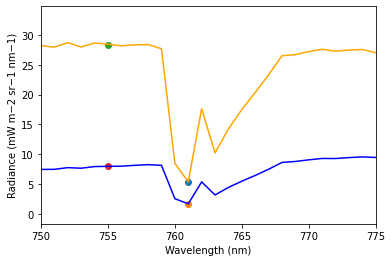

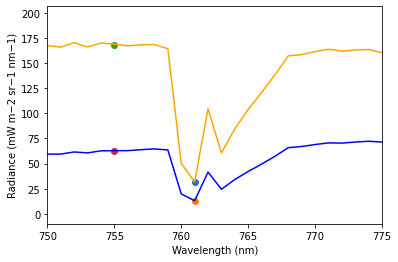

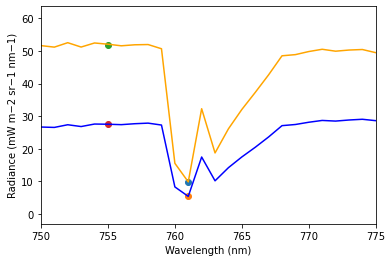

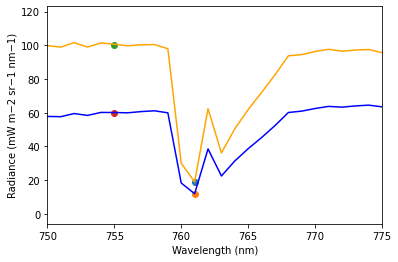

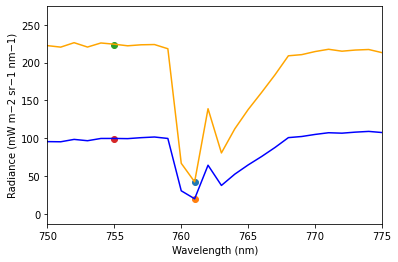

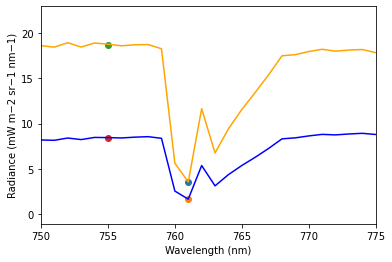

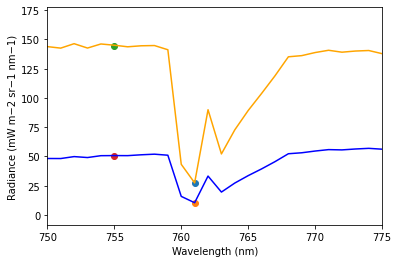

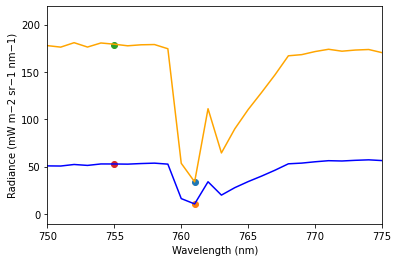

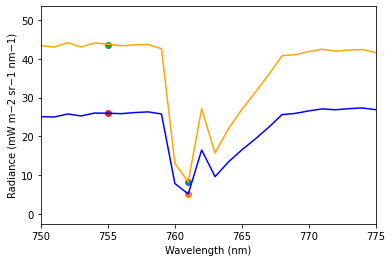

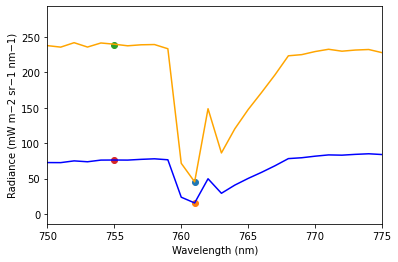

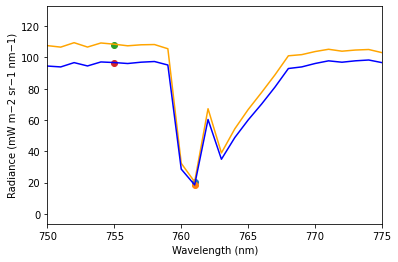

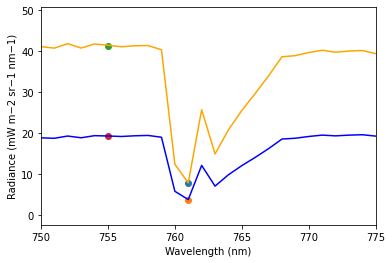

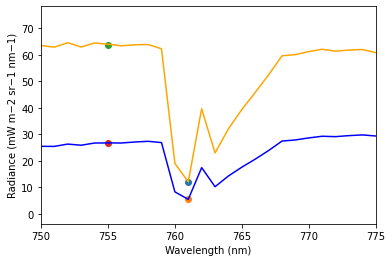

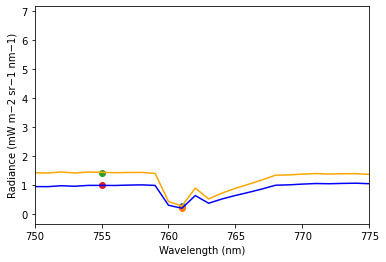

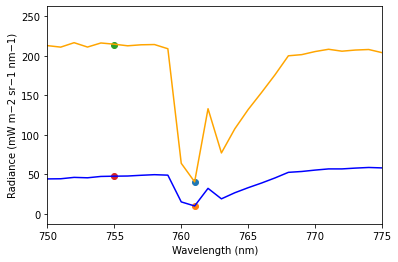

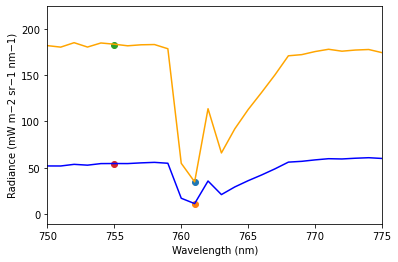

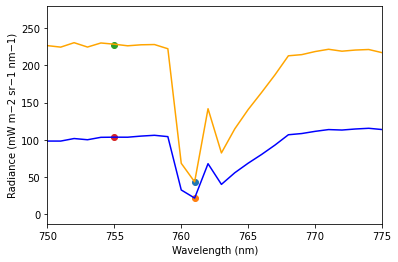

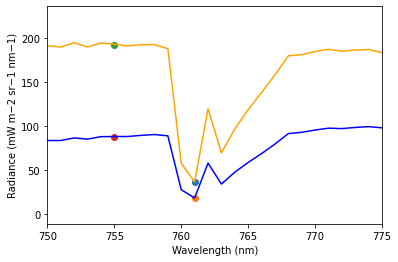

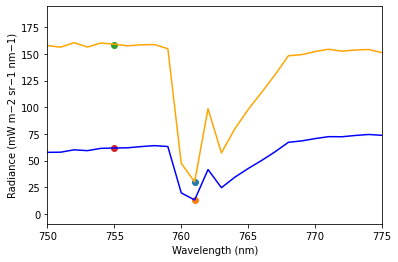

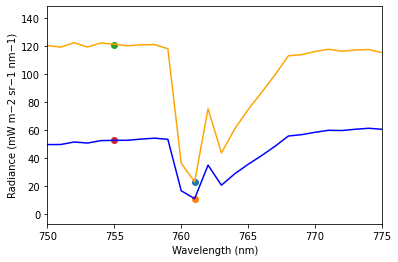

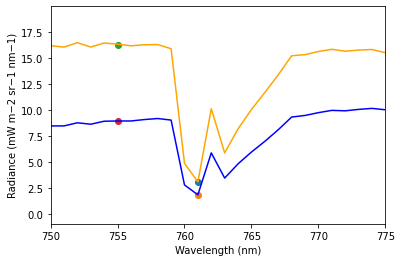

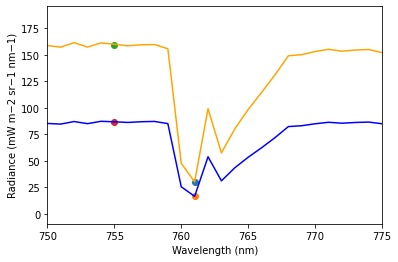

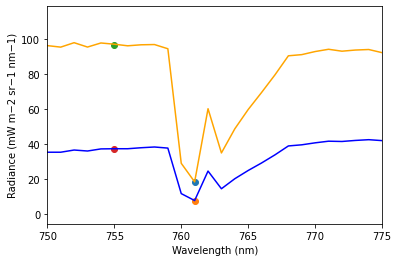

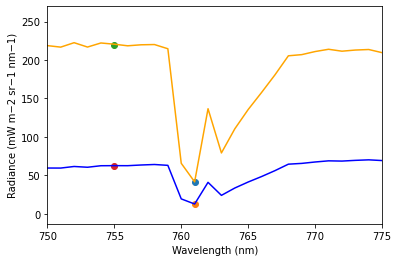

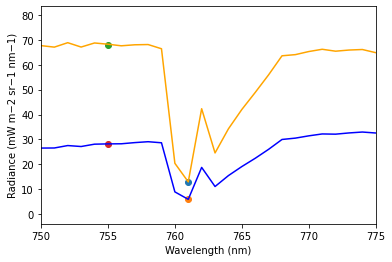

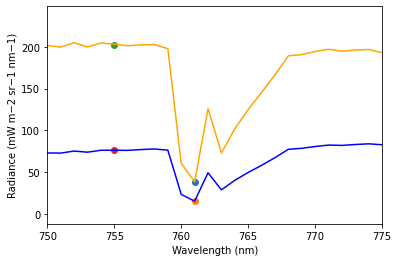

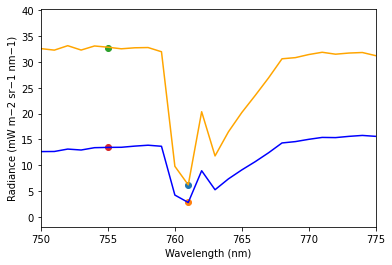

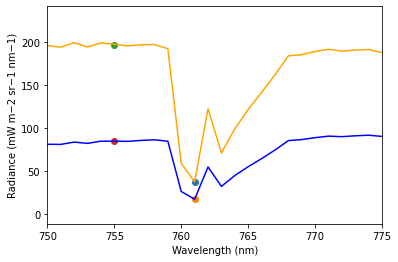

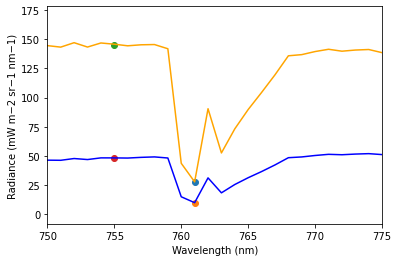

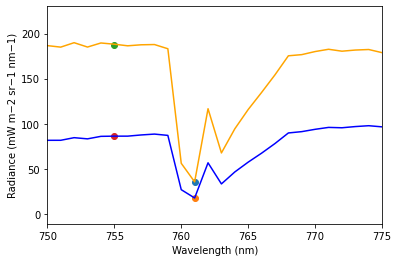

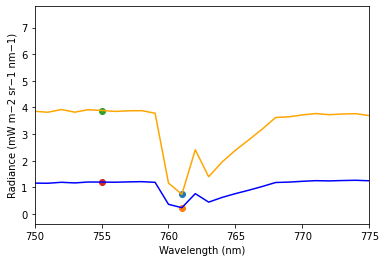

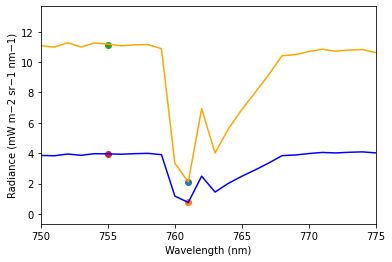

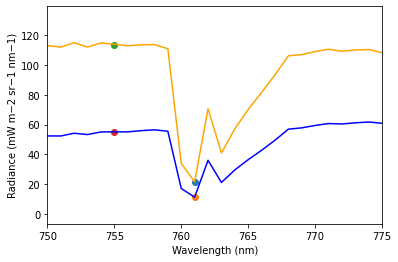

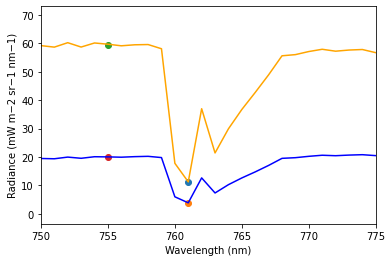

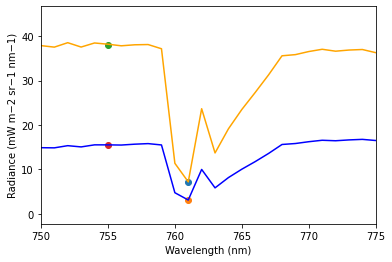

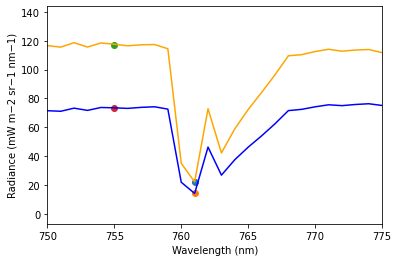

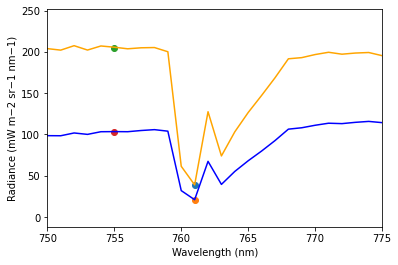

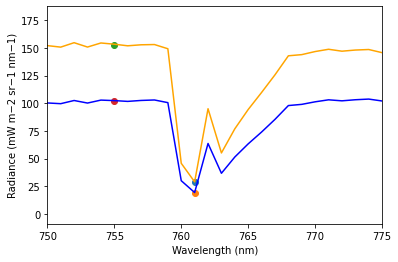

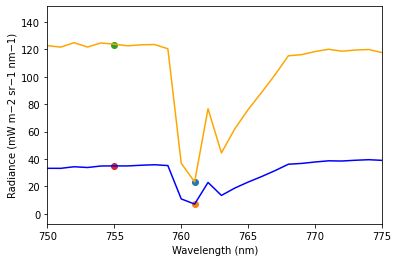

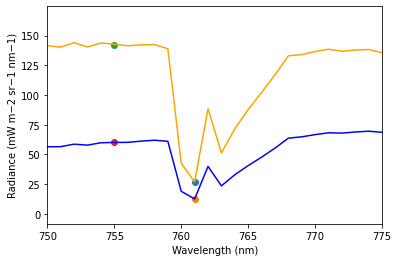

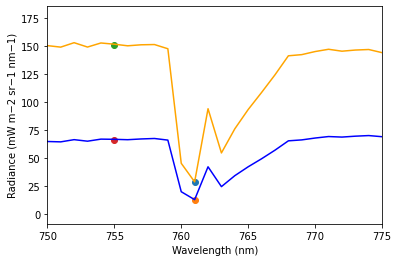

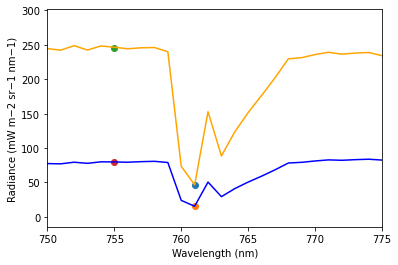

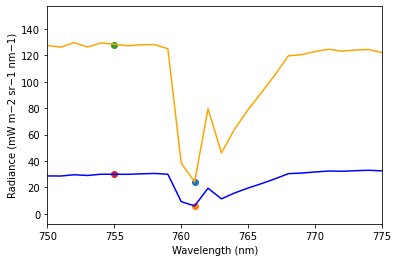

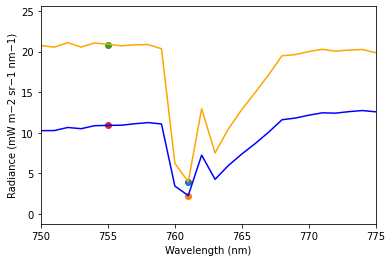

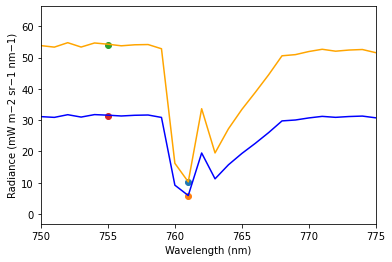

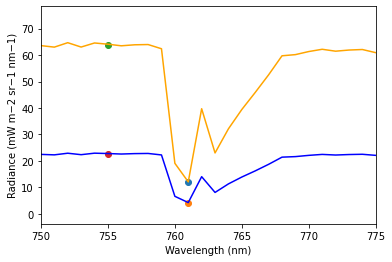

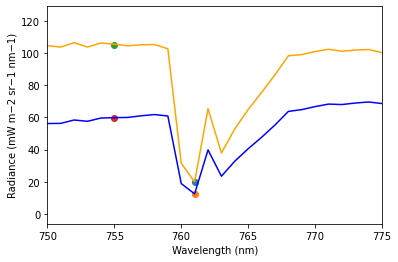

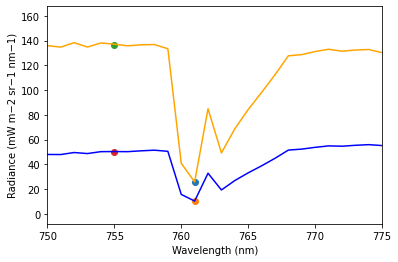

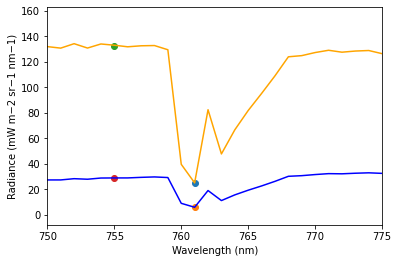

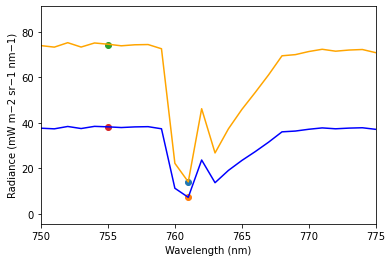

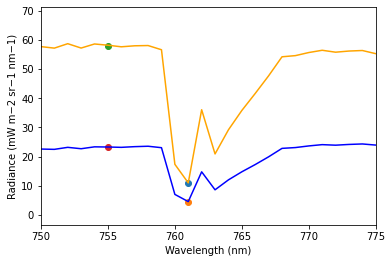

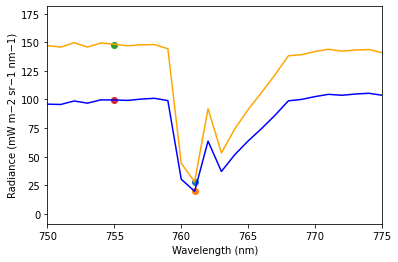

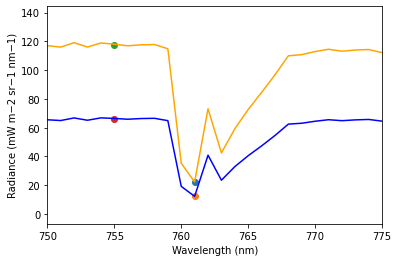

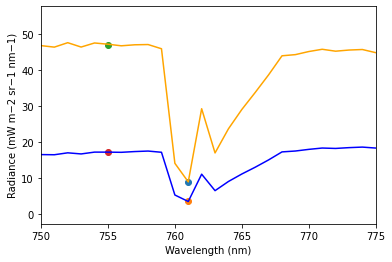

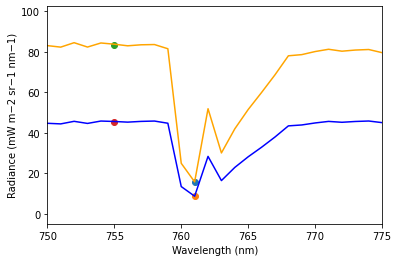

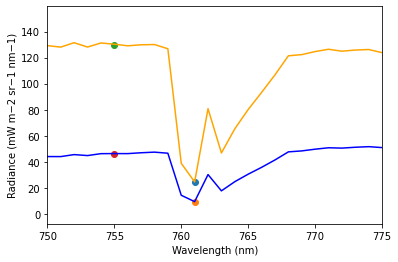

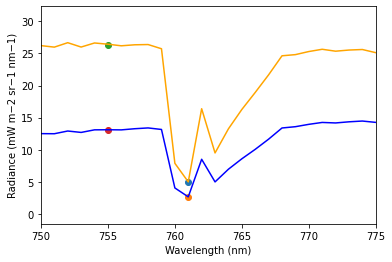

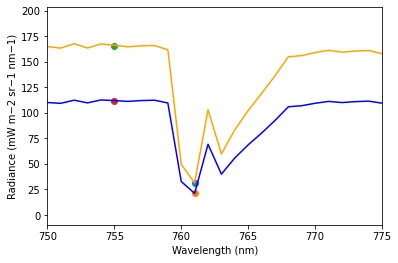

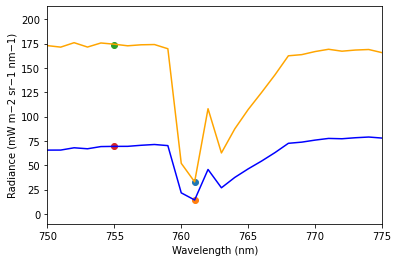

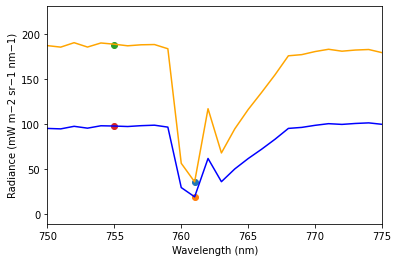

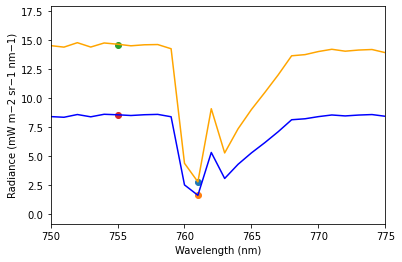

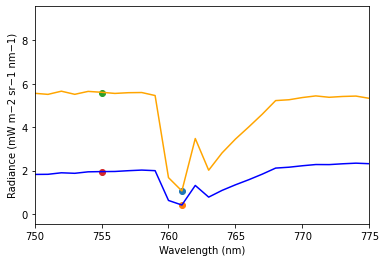

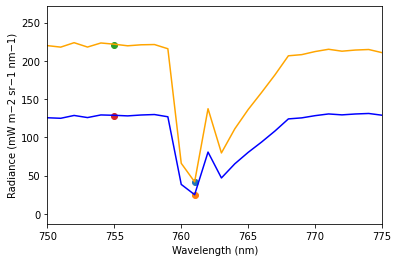

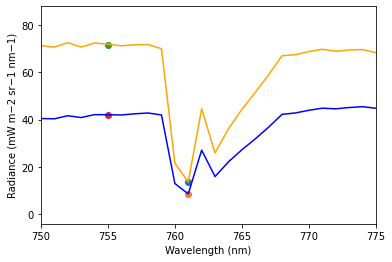

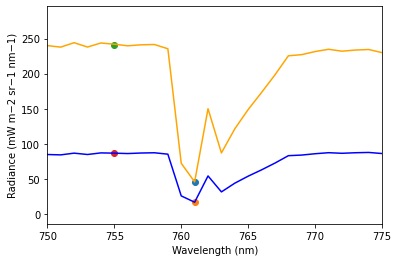

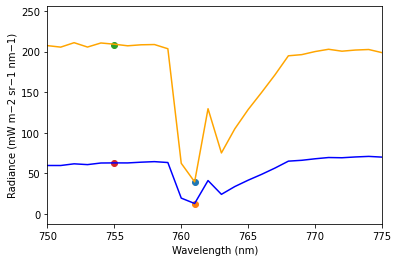

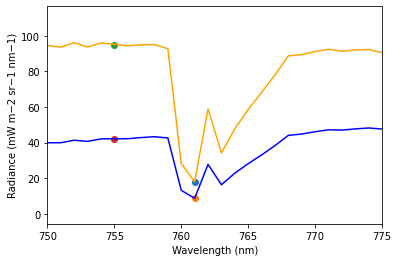

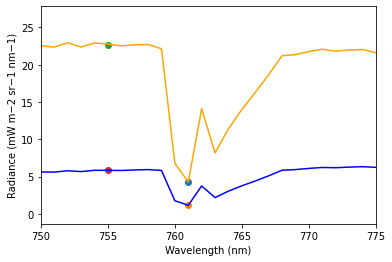

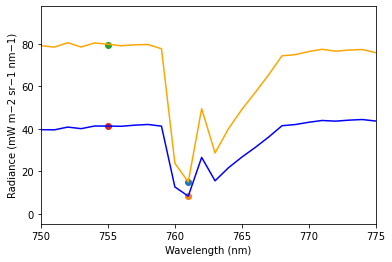

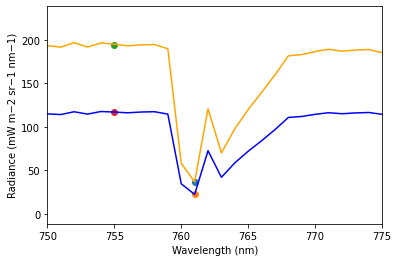

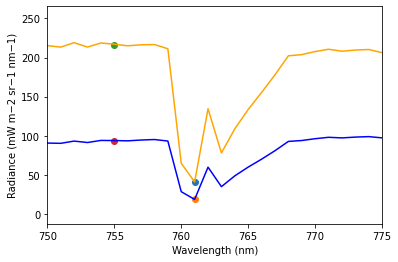

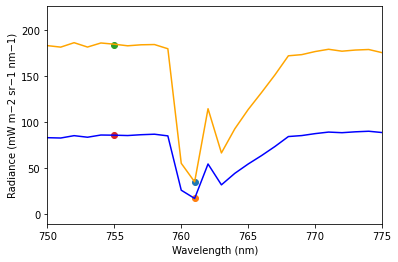

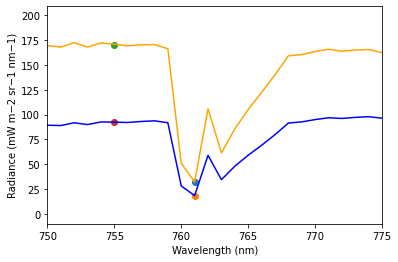

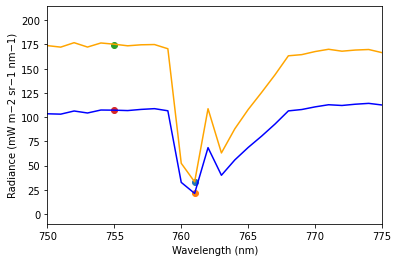

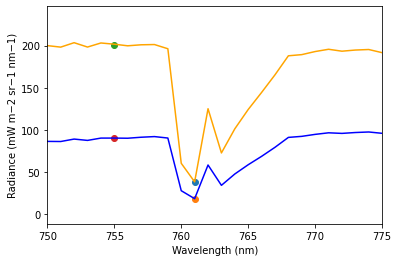

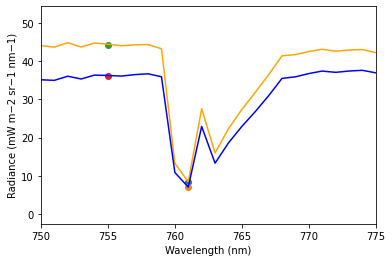

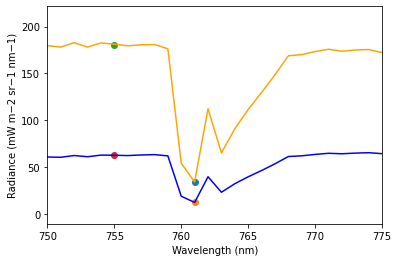

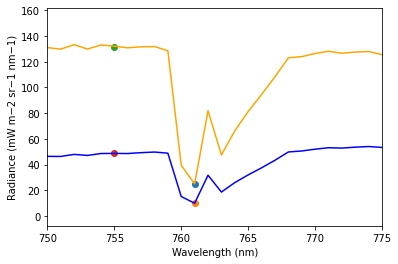

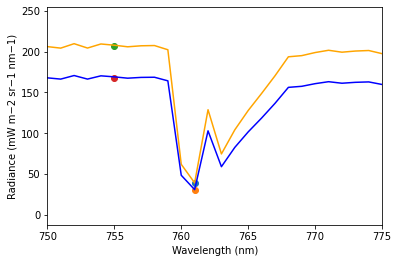

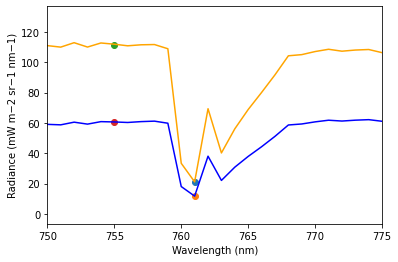

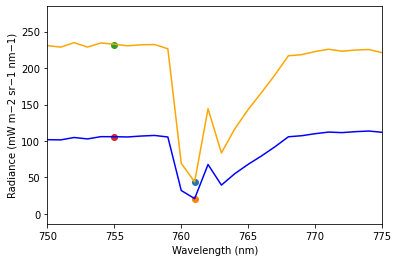

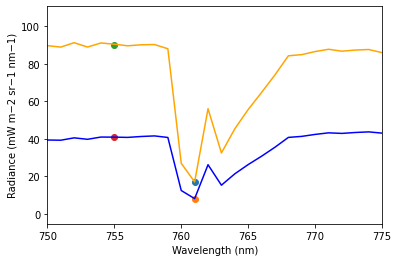

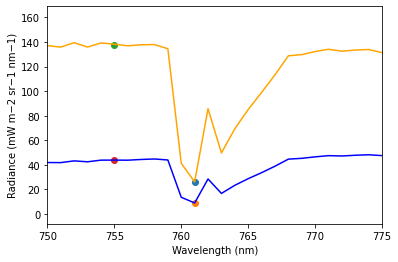

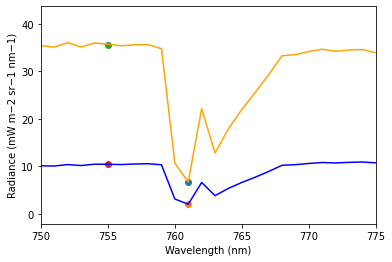

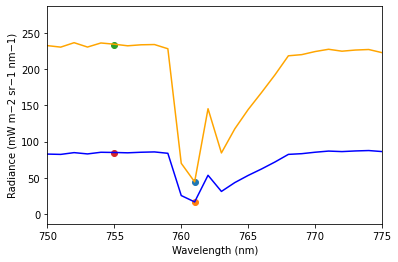

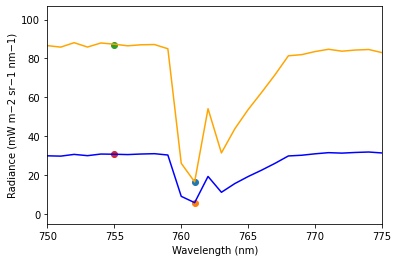

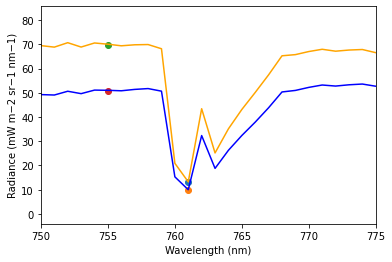

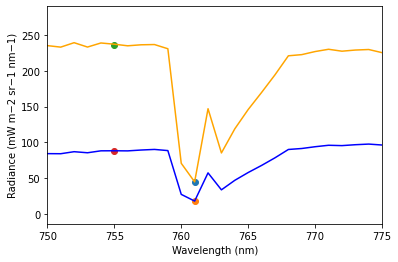

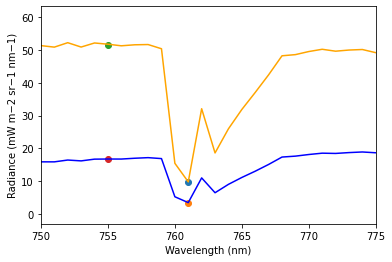

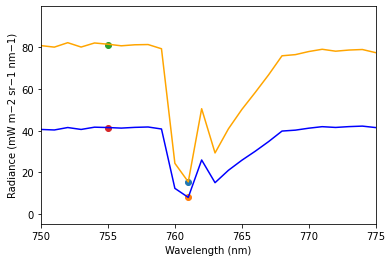

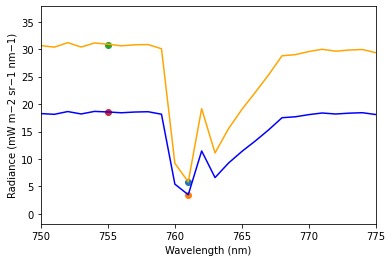

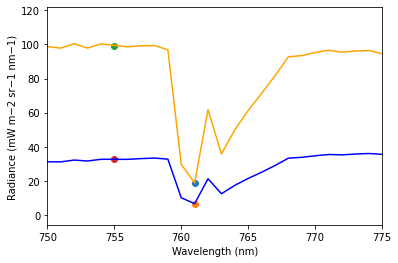

52.800377870169626

In [9]:
# test the sFLD method
percentage_errors = []
for i in range(len(e_df)):
    error = f_761.iloc[i] - sFLD(np.asarray(e_df.iloc[i]) / np.pi, np.asarray(l_df.iloc[i]), np.arange(400, 2562), fwhm =1)
    percentage_error = 100 * abs(error) / f_761.iloc[i]
    percentage_errors.append(percentage_error)

np.mean(percentage_errors)

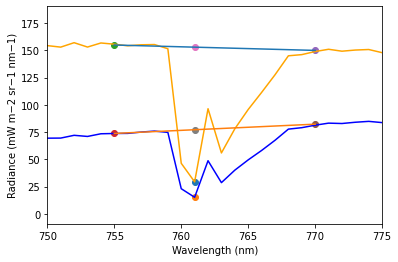

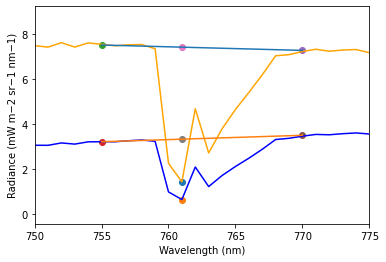

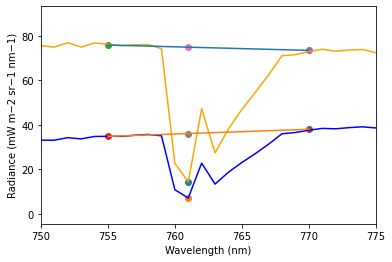

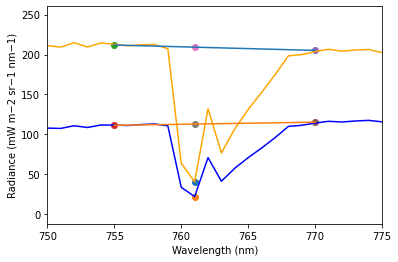

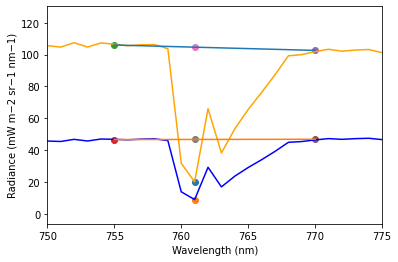

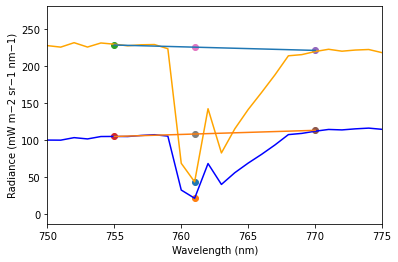

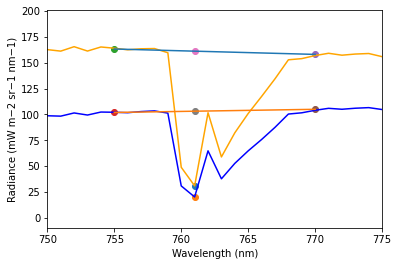

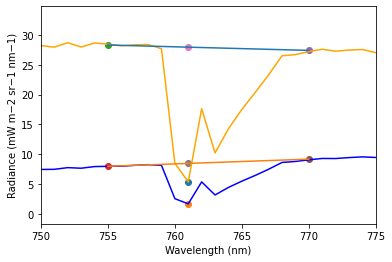

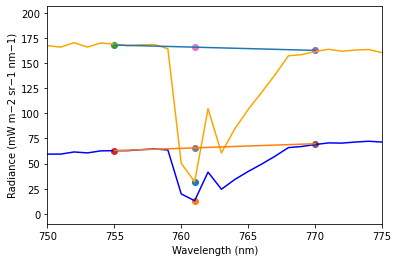

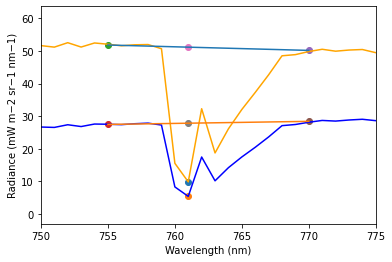

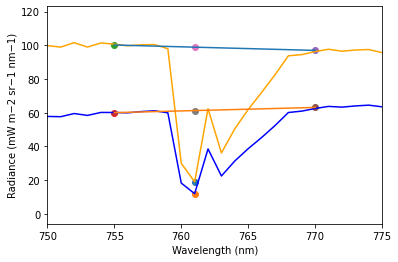

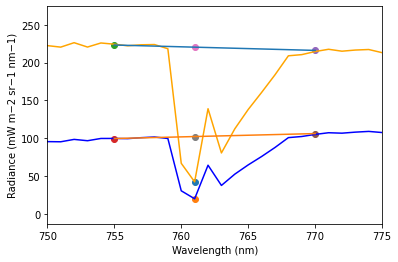

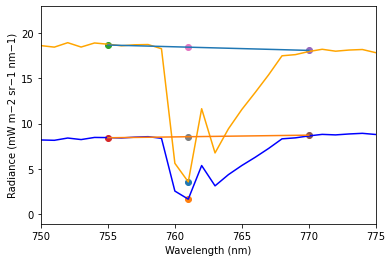

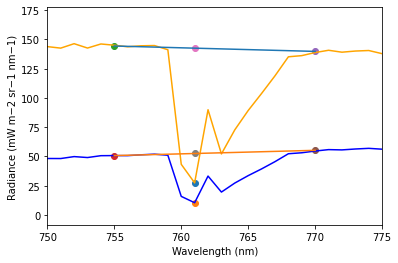

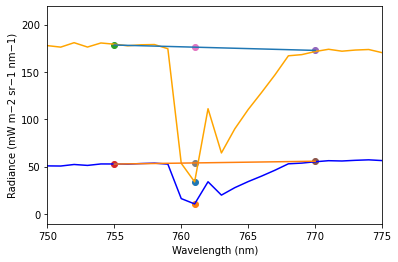

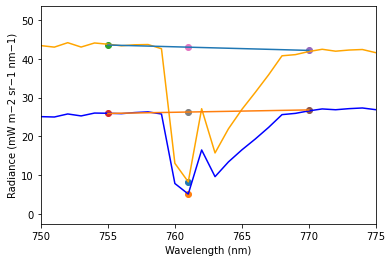

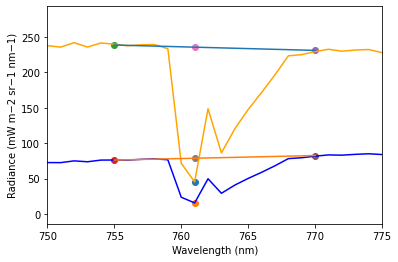

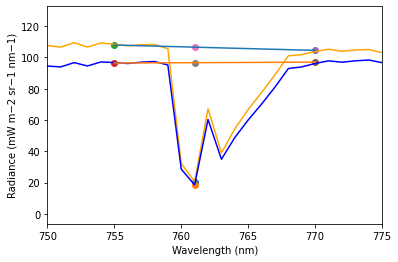

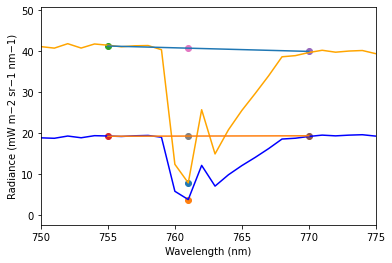

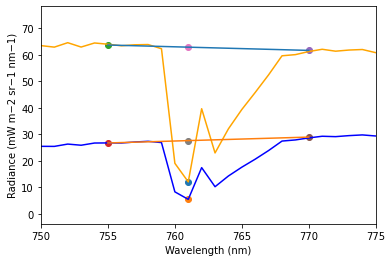

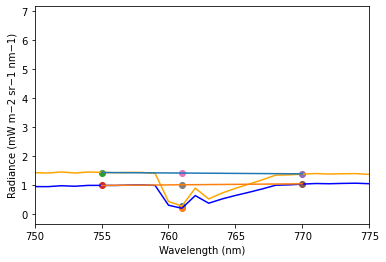

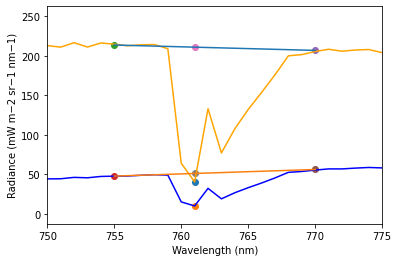

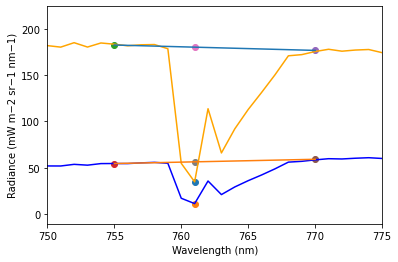

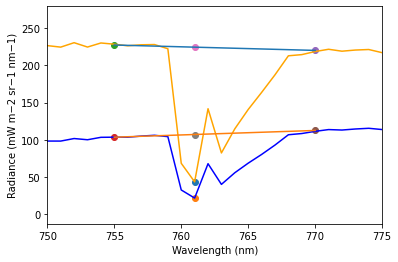

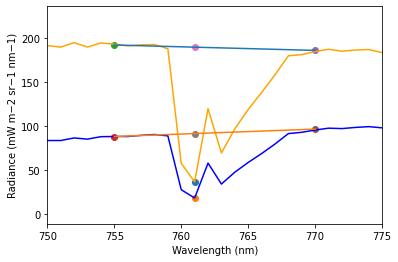

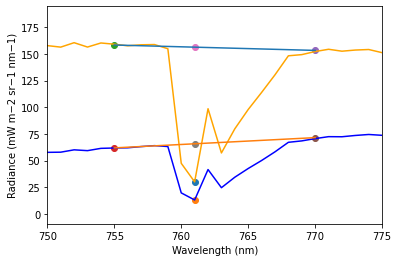

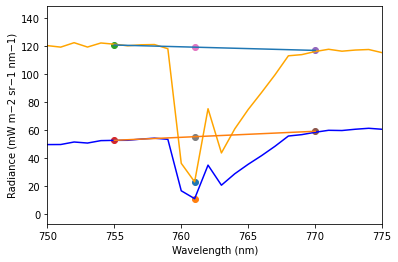

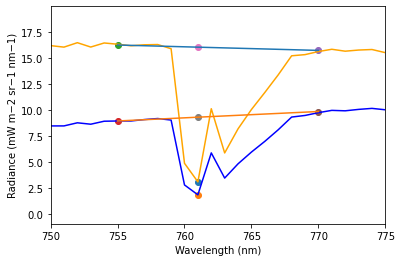

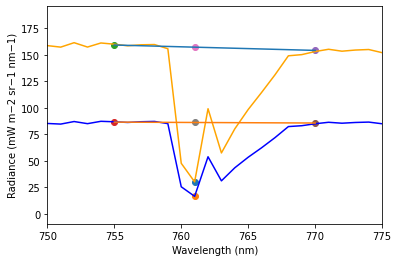

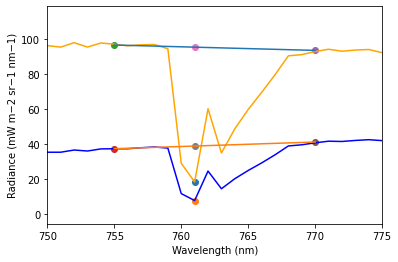

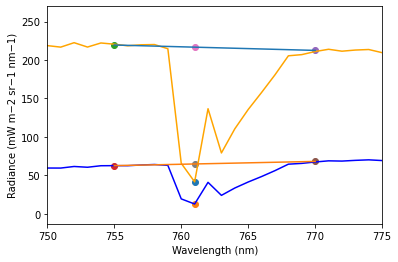

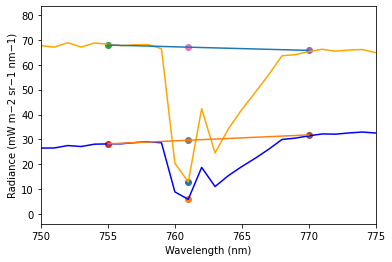

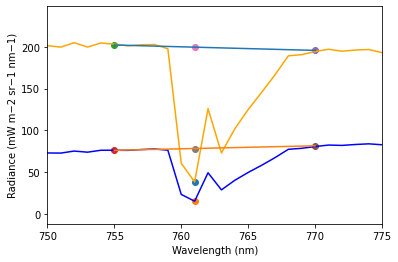

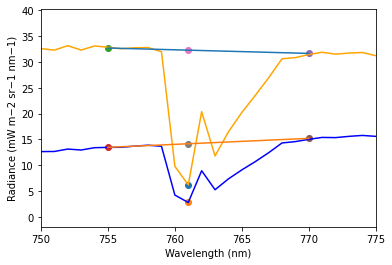

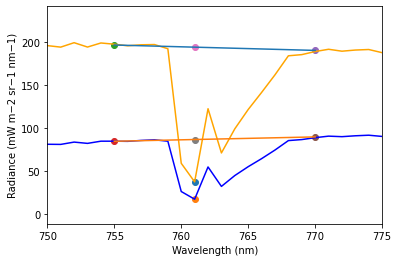

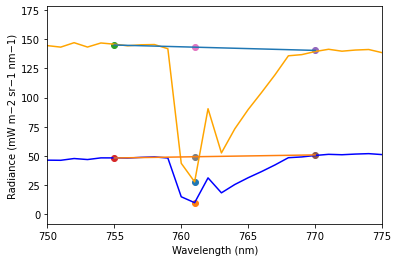

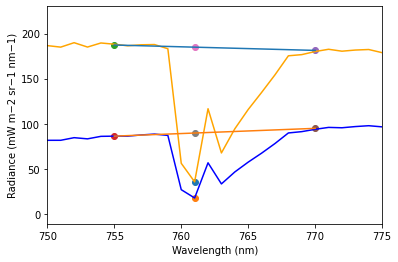

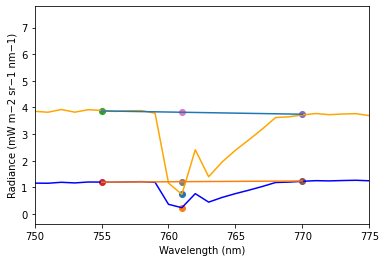

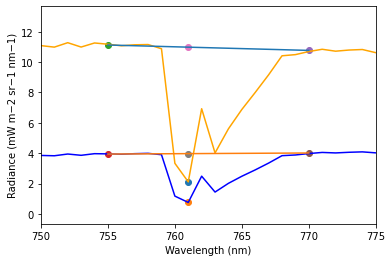

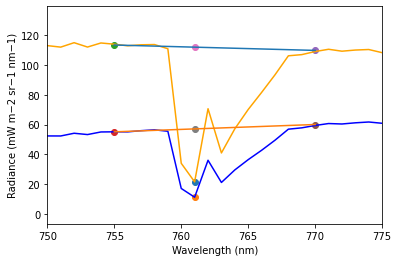

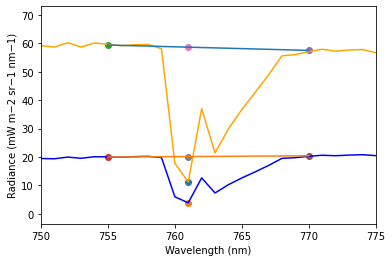

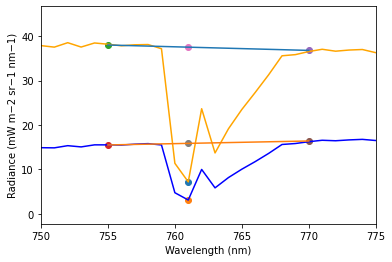

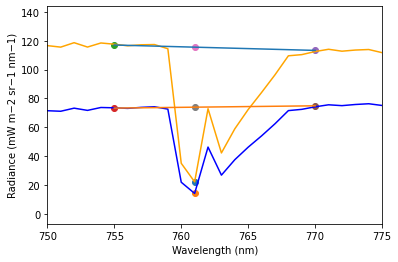

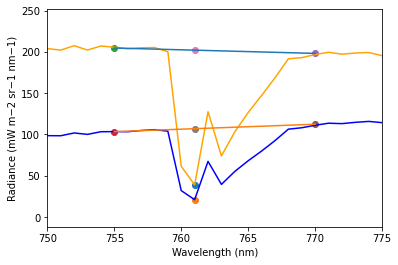

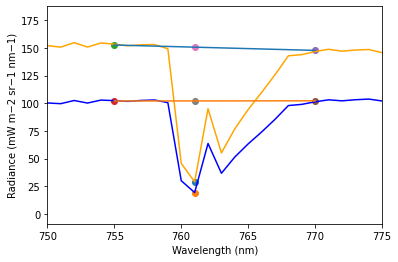

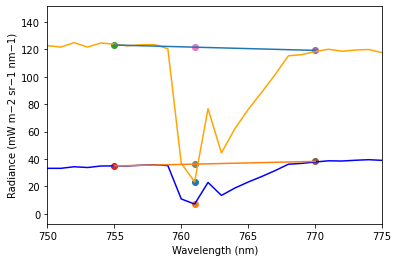

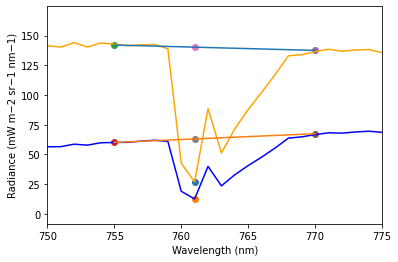

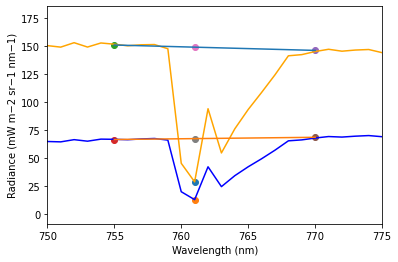

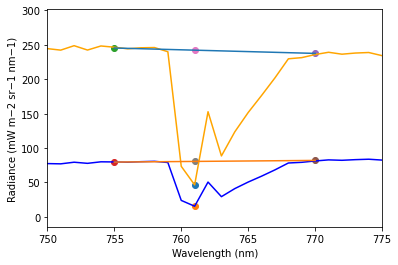

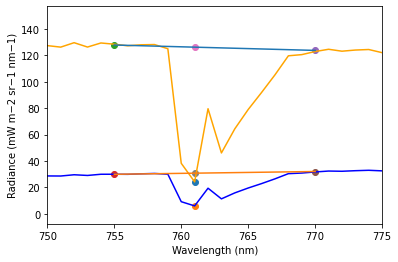

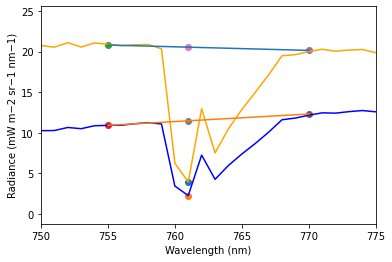

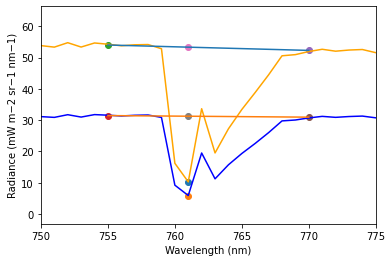

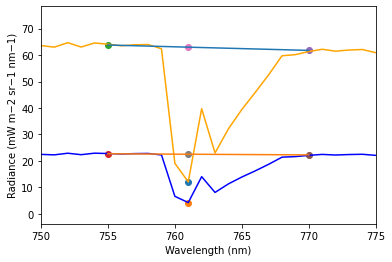

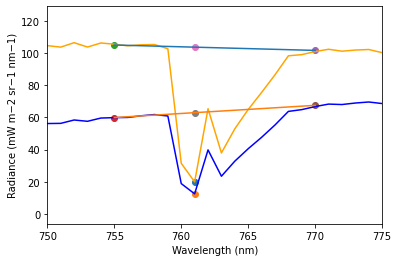

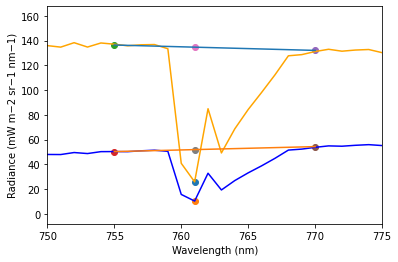

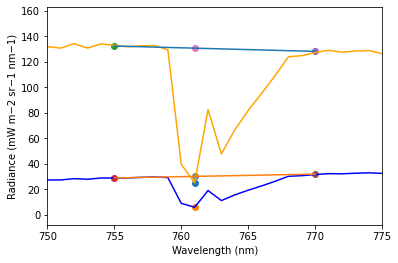

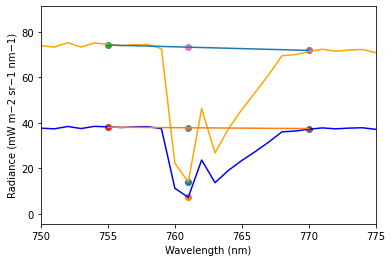

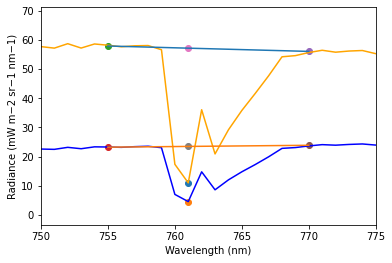

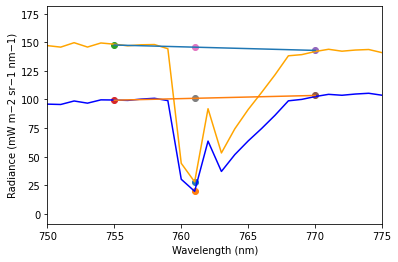

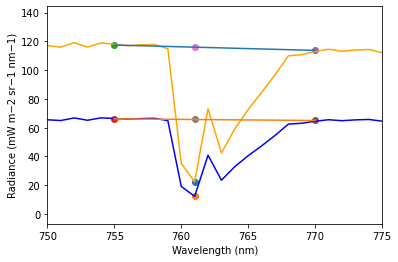

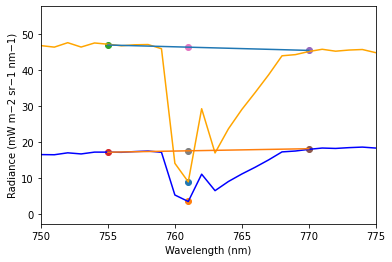

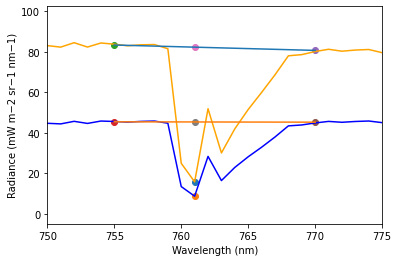

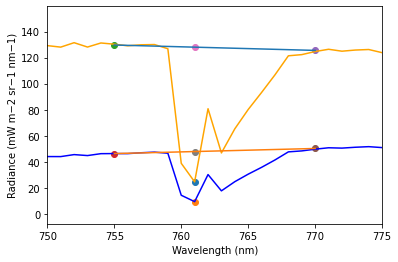

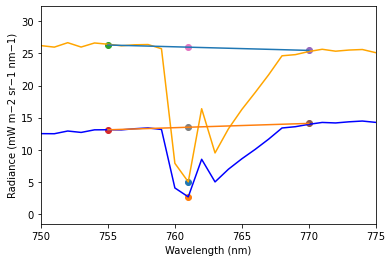

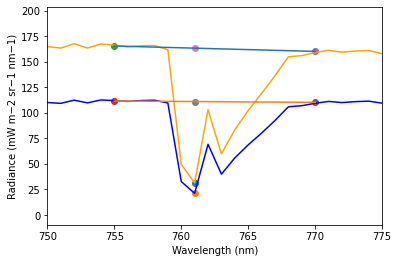

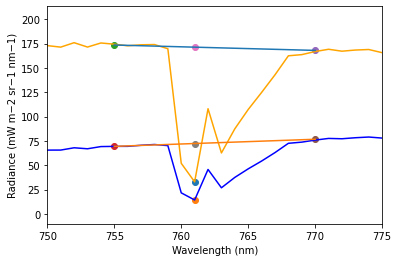

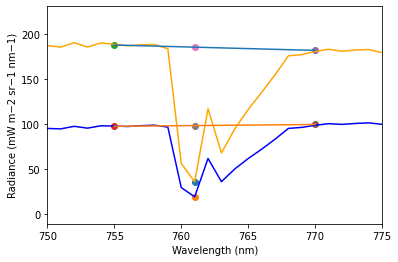

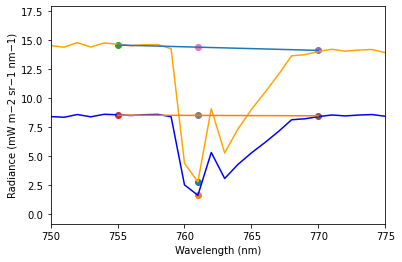

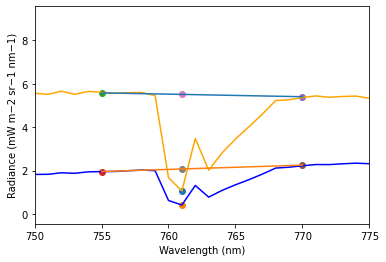

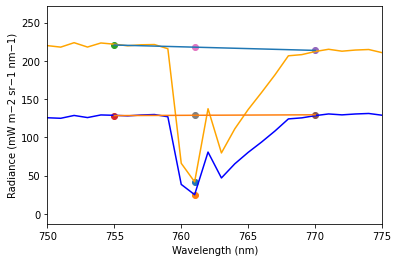

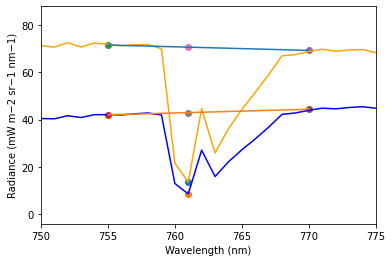

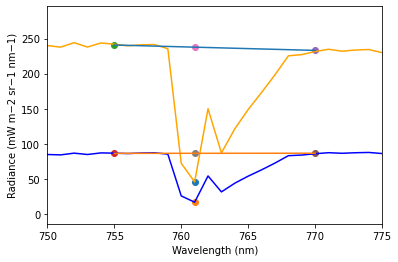

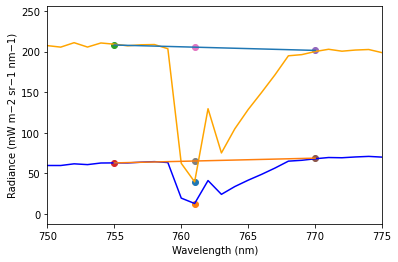

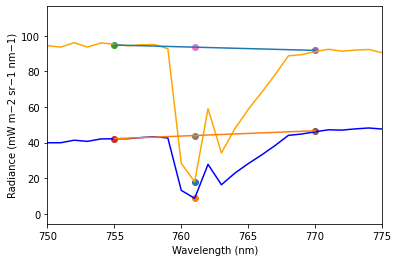

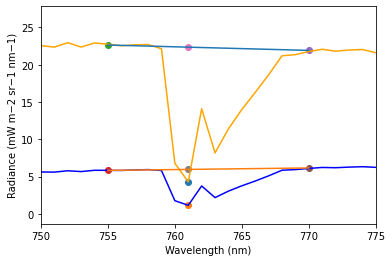

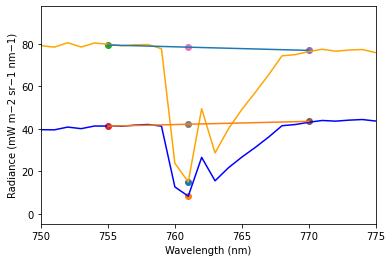

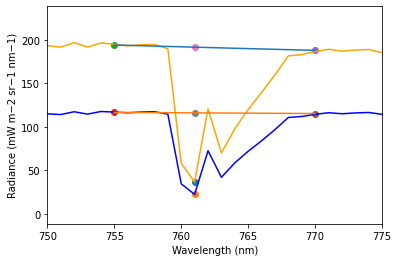

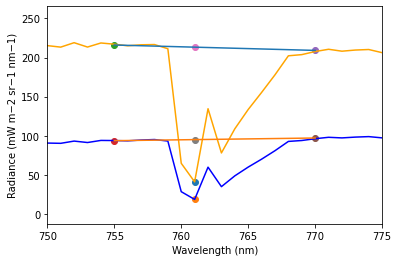

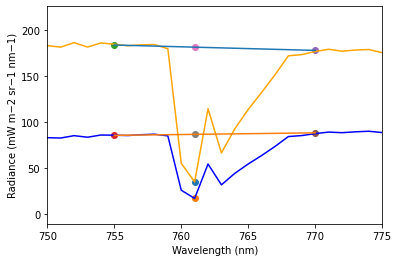

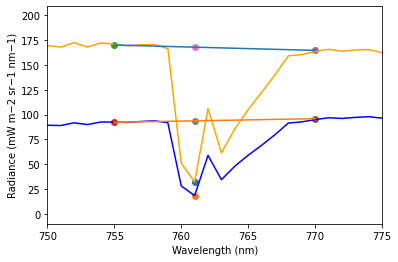

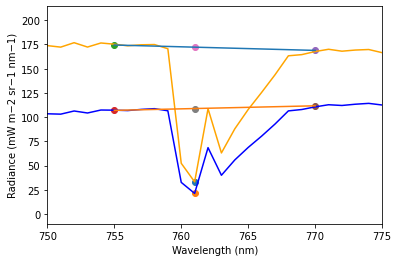

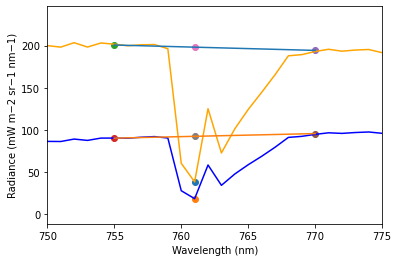

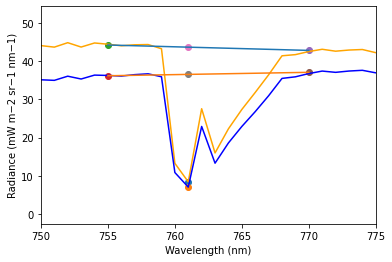

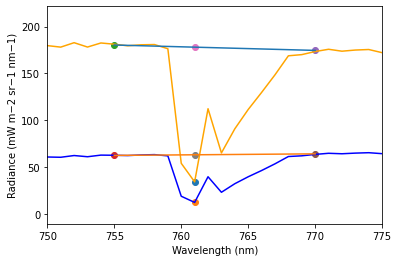

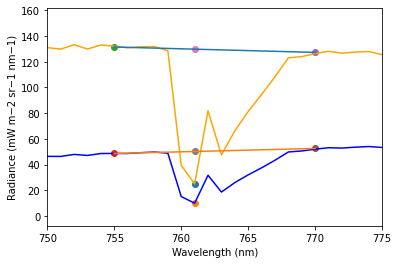

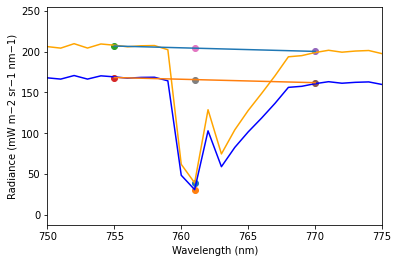

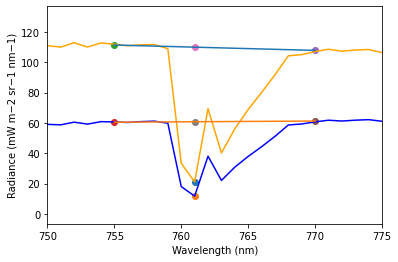

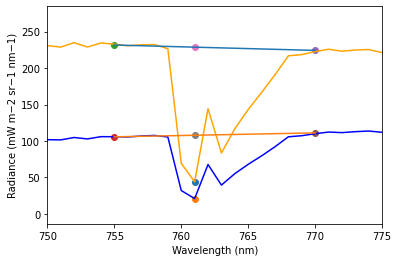

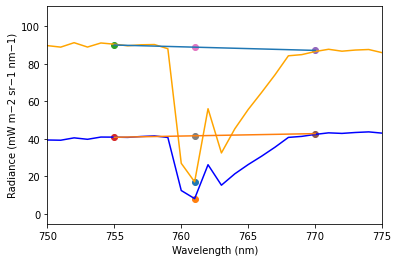

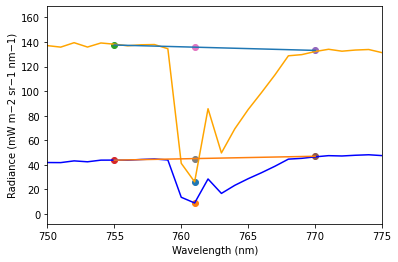

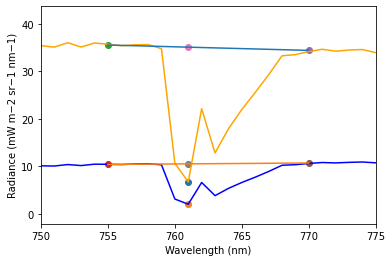

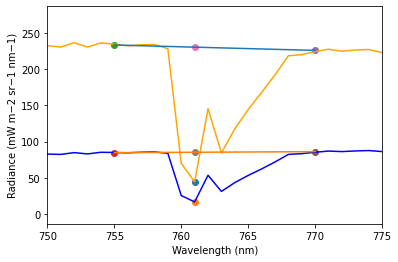

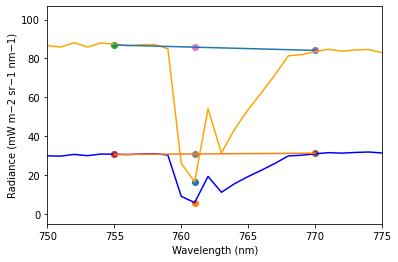

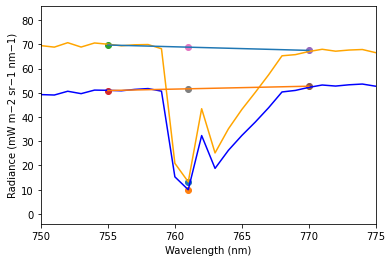

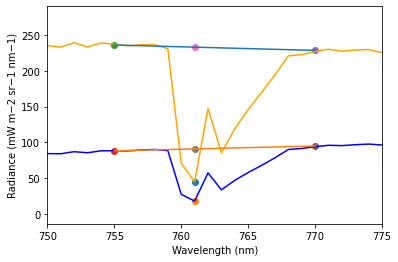

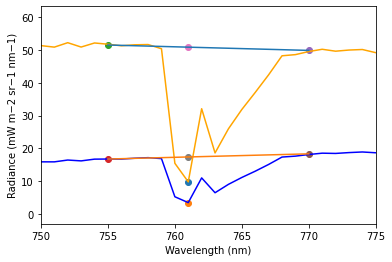

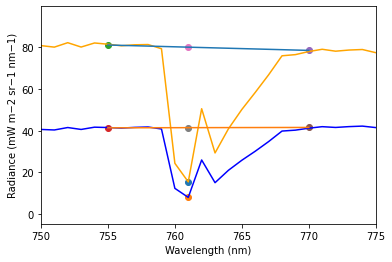

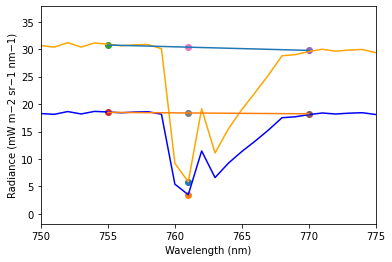

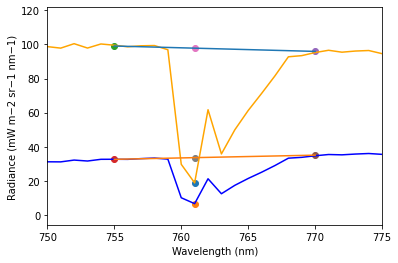

98.57034799858802

In [10]:
# test the 3FLD method
percentage_errors = []
for i in range(len(e_df)):
    error = f_761.iloc[i] - three_FLD(np.asarray(e_df.iloc[i]) / np.pi, np.asarray(l_df.iloc[i]), np.arange(400, 2562), fwhm = 1)
    percentage_error = 100 * abs(error) / f_761.iloc[i]
    percentage_errors.append(percentage_error)

np.mean(percentage_errors)

# Test methods on Resampled Spectra

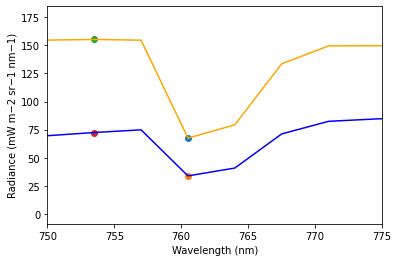

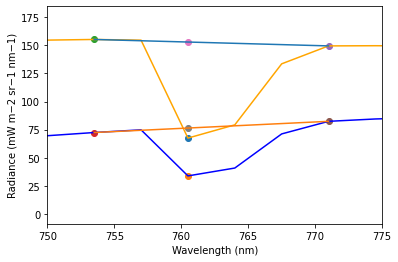

0.20516936096442012

In [11]:
# resample the dataframes at 3.5 nm FWHM
e_resampled, re_wave = resample_spectra(fwhm = 3.5, spectra = e_df.iloc[0])
l_resampled = resample_spectra(fwhm = 3.5, spectra = l_df.iloc[0])[0]

# test FLD methods on resampled spectras
sFLD(e_resampled / np.pi, l_resampled, re_wave, fwhm = 3.5)
three_FLD(e_resampled / np.pi, l_resampled, re_wave, fwhm = 3.5)

# Test on larger simulated SIF data set

In [12]:
# get the filepath names
e_large_pathname = "/Users/jameswallace/Desktop/Esun.csv"
l_large_pathname = "/Users/jameswallace/Desktop/Lo_spectrum_inclF.csv"
f_large_pathname = "/Users/jameswallace/Desktop/fluorescence_scalars.csv"
# place the spectra in readable dataframes
e_large_df = get_simulated_spectral_df(e_large_pathname)
l_large_df = get_simulated_spectral_df(l_large_pathname)
f_large_df = pd.read_csv(f_large_pathname)
f_large_df = f_large_df.iloc[2:]
f_large_df.index = np.arange(0, len(e_large_df))
# get the O2A fluorescence from the fluorescence scalars df
f_large_761 = pd.to_numeric(f_large_df['F761'])

In [13]:
# test the sFLD method
percentage_errors = []
for i in range(len(e_large_df)):
    error = f_large_761.iloc[i] - sFLD(np.asarray(e_large_df.iloc[i]) / np.pi, np.asarray(l_large_df.iloc[i]), np.arange(400, 2562), fwhm =1, plot = False)
    percentage_error = 100 * abs(error) / f_large_761.iloc[i]
    percentage_errors.append(percentage_error)

np.mean(percentage_errors)

48.69089159177616

In [14]:
# test the 3FLD method
percentage_errors = []
for i in range(len(e_large_df)):
    error = f_large_761.iloc[i] - three_FLD(np.asarray(e_large_df.iloc[i]) / np.pi, np.asarray(l_large_df.iloc[i]), np.arange(400, 2562), fwhm =1, plot = False)
    percentage_error = 100 * abs(error) / f_large_761.iloc[i]
    percentage_errors.append(percentage_error)

np.mean(percentage_errors)

75.0607163102975

# Now test the methods on the resampled data

In [15]:
# test the sFLD method
percentage_errors = []
for i in range(len(e_df)):
    e_spectra, re_wave = resample_spectra(fwhm = 3.5, spectra = e_df.iloc[i])
    l_spectra = resample_spectra(fwhm = 3.5, spectra = l_df.iloc[i])[0]
    error = f_761.iloc[i] - sFLD(e_spectra / np.pi, l_spectra, re_wave, fwhm = 3.5, plot = False)
    percentage_error = 100 * abs(error) / f_761.iloc[i]
    percentage_errors.append(percentage_error)

np.mean(percentage_errors)

189.6696524766911

In [16]:
# test the 3FLD method
percentage_errors = []
for i in range(len(e_df)):
    e_spectra, re_wave = resample_spectra(fwhm = 3.5, spectra = e_df.iloc[i])
    l_spectra = resample_spectra(fwhm = 3.5, spectra = l_df.iloc[i])[0]
    error = f_761.iloc[i] - three_FLD(e_spectra / np.pi, l_spectra, re_wave, fwhm = 3.5, plot = False)
    percentage_error = 100 * abs(error) / f_761.iloc[i]
    percentage_errors.append(percentage_error)

np.mean(percentage_errors)

156.8617639494762